# **Predicting BTC Close Price vand Vol1 using LSTM**

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Import the Data

In [60]:
df = pd.read_csv('BTC_Trial_NB.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace= True)
df.head()

,Month,Year,VOL1,VOL7,VOL30,ClosePrice,OpenPrice,HighPrice,LowPrice,Market Volumn,...,SP500,RUSSELL,Oil,Gold,Silver,USDEUR,USDYUAN,Interest Rate,Economic Uncertainty,Crypto Index
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-04,2,2018,0.058984,0.104624,0.204218,8277.01,9175.70,9334.87,8031.22,7.073550e+09,...,2648.94,1491.09,64.18,1336.5,16.71,0.80,6.30,1.80,0.234505,30
2018-02-05,2,2018,0.082982,0.130688,0.219808,6955.27,8270.54,8364.84,6756.68,9.285290e+09,...,2648.94,1491.09,64.18,1336.5,16.67,0.80,6.31,1.80,0.248054,15
2018-02-06,2,2018,0.041061,0.134668,0.221316,7754.00,7051.75,7850.70,6048.26,1.399980e+10,...,2695.14,1507.17,63.48,1329.5,16.58,0.81,6.29,1.82,0.223228,40
2018-02-07,2,2018,0.041213,0.136422,0.222866,7621.30,7755.49,8509.11,7236.79,9.169280e+09,...,2681.66,1507.97,61.91,1314.6,16.24,0.81,6.28,1.85,0.201785,24
2018-02-08,2,2018,0.030796,0.130387,0.222486,8265.59,7637.86,8558.77,7637.86,9.346750e+09,...,2581.00,1463.79,61.30,1319.0,16.34,0.82,6.27,1.85,0.183604,11


In [61]:
df.columns

Index(['Month', 'Year', 'VOL1', 'VOL7', 'VOL30', 'ClosePrice ', 'OpenPrice',
       'HighPrice', 'LowPrice', 'Market Volumn', 'Average Block Size',
       'Average Transaction Per Block', 'Hash Rate', 'Network Difficulty',
       'Unique Addresses', 'Transactions Per Second', 'SP500', 'RUSSELL',
       'Oil', 'Gold', 'Silver', 'USDEUR', 'USDYUAN', 'Interest Rate',
       'Economic Uncertainty', 'Crypto Index'],
      dtype='object')

In [62]:
df = df.drop(['Month', 'Year', 'Network Difficulty'], axis= 1)
df.head()

,VOL1,VOL7,VOL30,ClosePrice,OpenPrice,HighPrice,LowPrice,Market Volumn,Average Block Size,Average Transaction Per Block,...,SP500,RUSSELL,Oil,Gold,Silver,USDEUR,USDYUAN,Interest Rate,Economic Uncertainty,Crypto Index
Date,,,,,,,,,,,,,,,,,,,,,
2018-02-04,0.058984,0.104624,0.204218,8277.01,9175.70,9334.87,8031.22,7.073550e+09,0.99,975.77,...,2648.94,1491.09,64.18,1336.5,16.71,0.80,6.30,1.80,0.234505,30
2018-02-05,0.082982,0.130688,0.219808,6955.27,8270.54,8364.84,6756.68,9.285290e+09,1.10,1169.53,...,2648.94,1491.09,64.18,1336.5,16.67,0.80,6.31,1.80,0.248054,15
2018-02-06,0.041061,0.134668,0.221316,7754.00,7051.75,7850.70,6048.26,1.399980e+10,1.07,1436.00,...,2695.14,1507.17,63.48,1329.5,16.58,0.81,6.29,1.82,0.223228,40
2018-02-07,0.041213,0.136422,0.222866,7621.30,7755.49,8509.11,7236.79,9.169280e+09,1.07,1515.74,...,2681.66,1507.97,61.91,1314.6,16.24,0.81,6.28,1.85,0.201785,24
2018-02-08,0.030796,0.130387,0.222486,8265.59,7637.86,8558.77,7637.86,9.346750e+09,1.05,1322.82,...,2581.00,1463.79,61.30,1319.0,16.34,0.82,6.27,1.85,0.183604,11


# A. Predicting Close Price of BTC

#### An overview of the BTC's Close Price from 2018 t0 2024

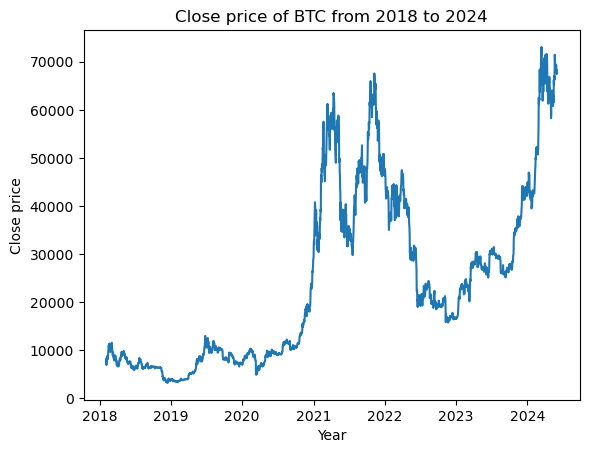

In [63]:
plt.plot(df['ClosePrice '])
plt.xlabel('Year')
plt.ylabel('Close price')
plt.title('Close price of BTC from 2018 to 2024')
plt.show()

## 1. Train - Test split 

- Splitting the dataframe into train and test set, with the training size of 80% 

In [64]:
train_size = int(np.ceil(df.shape[0] * .8))
train_df = df[: train_size]
test_df = df[train_size :]
train_df.shape, test_df.shape

((1848, 23), (462, 23))

## 2. Scale the data

- Using Min-Max scaling method to scale the training set, then use the scaling parameter of the training set to transform the test set

In [65]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_df)
test_scaled = scaler.transform(test_df)

In [66]:
train_scaled.shape, test_scaled.shape

((1848, 23), (462, 23))

## 3. Initialize input variables with timestep of 30  

- Creating the sliding window input of 30 previous observations to predict each target variable 

In [67]:
def close_price_model(df, wind_size=30):
    df_np = df
    X = [] 
    y = []
    for i in range(len(df_np) - wind_size):
        row = [a for a in df_np[i : i+wind_size]] 
        X.append(row)
        label = df_np[i+wind_size][3] # target index
        y.append(label)
    return np.array(X), np.array(y) 


In [68]:
X_close_train, y_close_train = close_price_model(train_scaled, 30)
X_close_test, y_close_test = close_price_model(test_scaled, 30)
X_close_train.shape, y_close_train.shape, X_close_test.shape, y_close_test.shape

((1818, 30, 23), (1818,), (432, 30, 23), (432,))

- The training data has 1818 obervations, with the timestep of 30 and using 23 features
- The testing data has 432 obervations, with the timestep of 30 and using 23 features

## 4. Fitting the Model with 1 LSTM layer (Vanilla)

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import *
from tensorflow.keras.losses import MeanSquaredError 
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

Fitting the LSTM model 

The model has:
+ 1 LSTM with 64 neurons
+ 2 Dense layers, the first Dense layer has 8 neurons and use RELU activation function

In [70]:
model = Sequential()
model.add(InputLayer((X_close_train.shape[1], X_close_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        22,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,057 (90.07 KB)

 Trainable params: 23,057 (90.07 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(loss = MeanSquaredError(), optimizer= Adam(learning_rate= 0.001), metrics= [RootMeanSquaredError()])

In [72]:
model.fit(X_close_train, y_close_train, validation_data=(X_close_test, y_close_test), epochs=20, batch_size=128) 

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0588 - root_mean_squared_error: 0.2359 - val_loss: 0.0069 - val_root_mean_squared_error: 0.0830
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0035 - root_mean_squared_error: 0.0585 - val_loss: 0.0131 - val_root_mean_squared_error: 0.1143
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0016 - root_mean_squared_error: 0.0402 - val_loss: 0.0114 - val_root_mean_squared_error: 0.1068
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0013 - root_mean_squared_error: 0.0354 - val_loss: 0.0101 - val_root_mean_squared_error: 0.1003
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0011 - root_mean_squared_error: 0.0332 - val_loss: 0.0084 - val_root_mean_squared_error: 0.0919
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0010 - root_mean_squared_error: 0.0317 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0870
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss:

## 5. Model's prediction and evaluation

- Model's prediction on the training set:

In [73]:
train_close_pred = model.predict(X_close_train).flatten()
train_close_result = pd.DataFrame(data= {'Train Pred':train_close_pred, 'Actual':y_close_train.flatten()})
train_close_result

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


,Train Pred,Actual
0,0.124972,0.117257
1,0.126651,0.104598
2,0.119781,0.095729
3,0.115692,0.094836
4,0.107067,0.087506
...,...,...
1813,0.318112,0.329544
1814,0.320333,0.325697
1815,0.320496,0.321945
1816,0.320947,0.310296


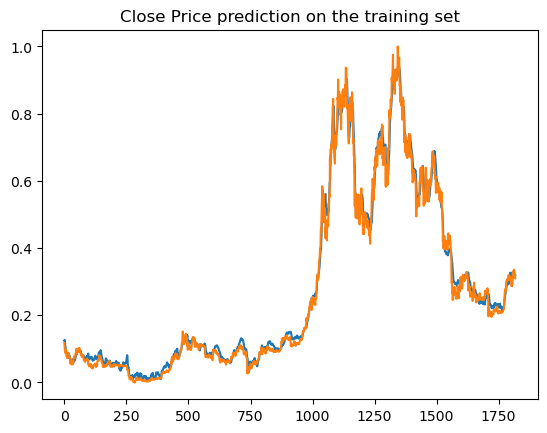

In [74]:
plt.plot(train_close_result['Train Pred'])
plt.plot(train_close_result['Actual'])
plt.title('Close Price prediction on the training set')
plt.show()

- Model's prediction on the test set:

In [75]:
test_close_pred = model.predict(X_close_test).flatten()
test_close_result = pd.DataFrame(data= {'Test Pred':test_close_pred, 'Actual':y_close_test.flatten()})
test_close_result

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


,Test Pred,Actual
0,0.341457,0.373564
1,0.346768,0.390357
2,0.351715,0.385462
3,0.355350,0.392378
4,0.356683,0.391330
...,...,...
427,1.043214,1.011338
428,1.016912,1.000175
429,1.013850,1.012407
430,1.004518,0.998828


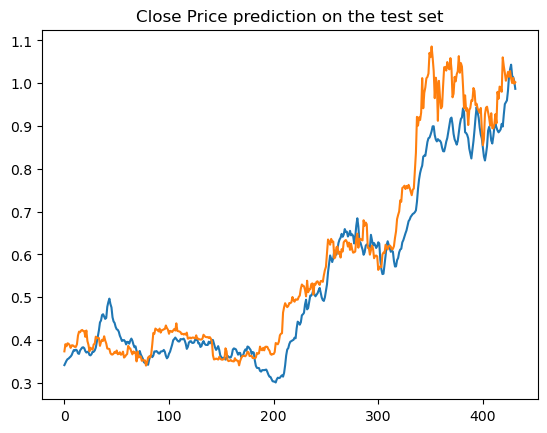

In [76]:
plt.plot(test_close_result['Test Pred'])
plt.plot(test_close_result['Actual'])
plt.title('Close Price prediction on the test set')
plt.show()

- The RMSE of the predicted value on the Test data: 

In [77]:
RMSE_1 = np.sqrt(mean_squared_error(y_close_test, test_close_pred))
print(f""" The RMSE of the model is: {RMSE_1}""")

 The RMSE of the model is: 0.06837965177015155


## 6. Hyperparameter tuning: Tuning model with 2 lstm layers and 2 Dense layers 


In [78]:
import keras_tuner as kt

- Initializing the model tuning function

The tuning model has:
+ 2 LSTM layers, with the option of 32, 64 or 128 neurons each
+ Additional Dropout layer for regularization after each LSTM layer, with the option of 0, 0.2 or 0.4
+ 2 Dense layers, the first Dense layer has the option of 16, 32 or 64 neurons, using either RELU or Tanh activation function
+ The learning rate choices for the model are 0.001, 0.01 or 0.1 

In [79]:
def build_model(hp):
    model = Sequential()
    model.add(InputLayer((X_close_train.shape[1], X_close_train.shape[2])))
    
    lstm_units = hp.Choice('lstm_units', values=[32, 64, 128])
    model.add(LSTM(lstm_units, return_sequences=True))
    
    dropout_rate = hp.Choice('dropout_rate', values=[0.2, 0.3])
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    
    activation_function = hp.Choice('activation_function', values=['relu', 'tanh'])
    dense_units = hp.Choice('dense_units', values=[16, 32, 64])  
    model.add(Dense(dense_units, activation=activation_function))
    model.add(Dense(1, activation='linear'))
    
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
    model.compile(
        loss=MeanSquaredError(),
        optimizer=Adam(learning_rate=learning_rate),
        metrics=[RootMeanSquaredError()]
    )
    return model

In [80]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=30,
    executions_per_trial=1,
    directory='multi_003',
    project_name='lstm_tuning'
)

- Start the tuning process

We set the number of epoch equals 20 with the batch size of 32. The model uses the Test set as the validation data. 

In [81]:
tuner.search(
    X_close_train, y_close_train,
    epochs= 20,
    batch_size= 32,
    validation_data=(X_close_test, y_close_test)
)

Trial 30 Complete [00h 00m 55s]
val_loss: 0.016788028180599213

Best val_loss So Far: 0.0019496874883770943
Total elapsed time: 01h 28m 44s


- Obtaining the best performing model and set it to "best_model"

In [82]:
best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\Ha Tung Lam\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


This is the result of the 10 best performing model:

In [83]:
tuner.results_summary()

Results summary
Results in multi_003\lstm_tuning
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 19 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.3
activation_function: tanh
dense_units: 64
learning_rate: 0.01
Score: 0.0019496874883770943

Trial 24 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.2
activation_function: relu
dense_units: 64
learning_rate: 0.01
Score: 0.0020723389461636543

Trial 00 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.2
activation_function: tanh
dense_units: 64
learning_rate: 0.01
Score: 0.004003316164016724

Trial 03 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 0.3
activation_function: tanh
dense_units: 16
learning_rate: 0.001
Score: 0.005014617461711168

Trial 06 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 0.3
activation_function: tanh
dense_units: 16
learning_rate: 0.01
Score: 0.0051412321627140045

Trial 13 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 0.2
activation_function

- Extracting the hyperparameters from the best performing model and set it to "best_hp"

In [84]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The best hyperparameters are:
- lstm_units: {best_hps.get('lstm_units')}
- dropout_rate: {best_hps.get('dropout_rate')}
- activation function: {best_hps.get('activation_function')}
- dense_units: {best_hps.get('dense_units')}
- learning_rate: {best_hps.get('learning_rate')}
""")


The best hyperparameters are:
- lstm_units: 64
- dropout_rate: 0.3
- activation function: tanh
- dense_units: 64
- learning_rate: 0.01



- Predicting the value of the Test data using best_model:

In [85]:
y_close_test_best_pred = best_model.predict(X_close_test).flatten()
best_close_test_result = pd.DataFrame(data= {'Test Pred':y_close_test_best_pred, 'Actual':y_close_test.flatten()})
best_close_test_result

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


,Test Pred,Actual
0,0.397090,0.373564
1,0.396021,0.390357
2,0.398094,0.385462
3,0.402952,0.392378
4,0.409466,0.391330
...,...,...
427,0.957266,1.011338
428,0.943943,1.000175
429,0.941300,1.012407
430,0.938570,0.998828


## 7. Tuned model evaluation and comparision 

- The RMSE of best_model on the Test data:

In [86]:
RMSE_tuned = np.sqrt(mean_squared_error(y_close_test, y_close_test_best_pred))
print(f""" The RMSE of the tuned model is: {RMSE_tuned}""")

 The RMSE of the tuned model is: 0.044155266433665144


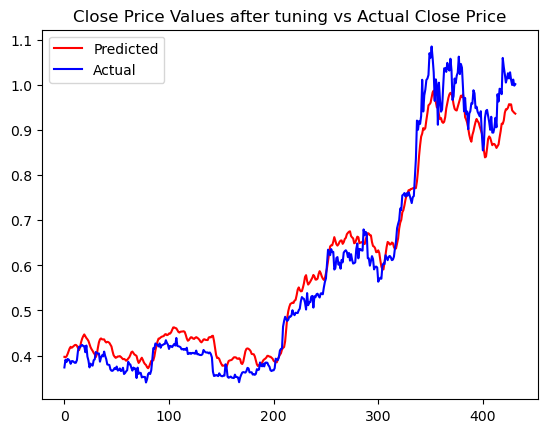

In [87]:
plt.plot(best_close_test_result['Test Pred'], label='Predicted', color='red')
plt.plot(best_close_test_result['Actual'], label='Actual', color='blue')
plt.title('Close Price Values after tuning vs Actual Close Price')
plt.legend(loc='upper left')
plt.show()

- Comparing the RMSE results of both model: 

In [88]:
print(f"""
The RMSE of pre-tuned model on the Test set: {RMSE_1}
The RMSE of  the optimized model on the Test set: {RMSE_tuned}
""")


The RMSE of pre-tuned model on the Test set: 0.06837965177015155
The RMSE of  the optimized model on the Test set: 0.044155266433665144



-> The optimized model performs much better than the first Vanilla model with lower Root Mean Squared Error on the Test data 

- Comparision of LSTM model's performance before and after tuning:

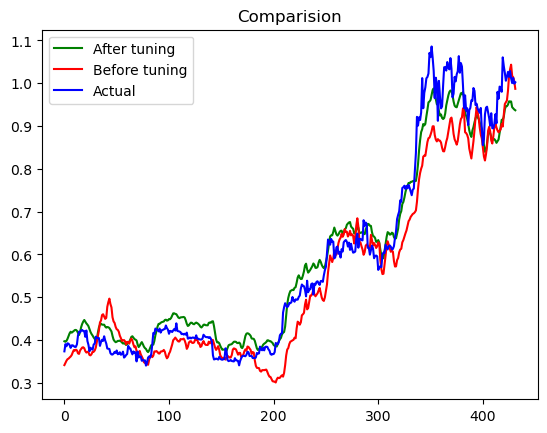

In [89]:
plt.plot(best_close_test_result['Test Pred'], label='After tuning', color='green')
plt.plot(test_close_result['Test Pred'], label='Before tuning', color='red')
plt.plot(test_close_result['Actual'], label='Actual', color='blue')
plt.title('Comparision')
plt.legend(loc='upper left')
plt.show()

# B. VOL_1 Prediction of BTC

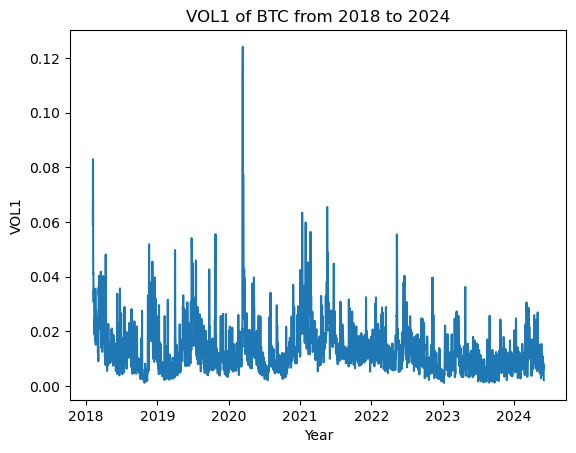

In [90]:
plt.plot(df['VOL1'])
plt.xlabel('Year')
plt.ylabel('VOL1')
plt.title('VOL1 of BTC from 2018 to 2024')
plt.show()

In [91]:
def vol1_price_model(df, wind_size=30):
    df_np = df
    X = [] 
    y = []
    for i in range(len(df_np) - wind_size):
        row = [a for a in df_np[i : i+wind_size]] 
        X.append(row)
        label = df_np[i+wind_size][0] # target index
        y.append(label)
    return np.array(X), np.array(y) 

In [92]:
X_v1_train, y_v1_train = vol1_price_model(train_scaled, 30)
X_v1_test, y_v1_test = vol1_price_model(test_scaled, 30)
X_v1_train.shape, y_v1_train.shape, X_v1_test.shape, y_v1_test.shape

((1818, 30, 23), (1818,), (432, 30, 23), (432,))

In [93]:
def build_model_vol1(hp):
    model = Sequential()
    model.add(InputLayer((X_close_train.shape[1], X_close_train.shape[2])))
    
    lstm_units = hp.Choice('lstm_units', values=[64, 128, 256])
    model.add(LSTM(lstm_units, return_sequences=True))
    
    dropout_rate = hp.Choice('dropout_rate', values=[0.2, 0.4])
    model.add(Dropout(dropout_rate))
    
    model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    
    activation_function = hp.Choice('activation_function', values=['relu', 'tanh'])
    dense_units = hp.Choice('dense_units', values=[16, 32, 64])  
    model.add(Dense(dense_units, activation=activation_function))
    model.add(Dense(1, activation='linear'))
    
    learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])
    model.compile(
        loss=MeanSquaredError(),
        optimizer=Adam(learning_rate=learning_rate),
        metrics=[RootMeanSquaredError()]
    )
    return model

In [94]:
tuner_vol1 = kt.RandomSearch(
    build_model_vol1,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=1,
    directory='vol1_002',
    project_name='lstm_tuning_v1'
)

In [95]:
tuner_vol1.search(
    X_v1_train, y_v1_train,
    epochs= 20,
    batch_size= 32,
    validation_data=(X_v1_test, y_v1_test)
)

Trial 20 Complete [00h 02m 12s]
val_loss: 0.0013798951404169202

Best val_loss So Far: 0.0013432851992547512
Total elapsed time: 00h 28m 51s


In [96]:
best_model_vol1 = tuner_vol1.get_best_models(num_models=1)[0]

c:\Users\Ha Tung Lam\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [97]:
tuner_vol1.results_summary()

Results summary
Results in vol1_002\lstm_tuning_v1
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 00 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.2
activation_function: tanh
dense_units: 16
learning_rate: 0.01
Score: 0.0013432851992547512

Trial 09 summary
Hyperparameters:
lstm_units: 64
dropout_rate: 0.2
activation_function: relu
dense_units: 16
learning_rate: 0.01
Score: 0.001348624238744378

Trial 12 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 0.2
activation_function: tanh
dense_units: 32
learning_rate: 0.001
Score: 0.0013685026206076145

Trial 18 summary
Hyperparameters:
lstm_units: 256
dropout_rate: 0.2
activation_function: tanh
dense_units: 16
learning_rate: 0.001
Score: 0.001373247941955924

Trial 01 summary
Hyperparameters:
lstm_units: 256
dropout_rate: 0.4
activation_function: relu
dense_units: 64
learning_rate: 0.001
Score: 0.0013752615777775645

Trial 15 summary
Hyperparameters:
lstm_units: 128
dropout_rate: 0.2
activation_fun

In [98]:
best_hps_vol1 = tuner_vol1.get_best_hyperparameters(num_trials=1)[0]

In [99]:
print(f"""
The best hyperparameters are:
- lstm_units: {best_hps_vol1.get('lstm_units')}
- dropout_rate: {best_hps_vol1.get('dropout_rate')}
- activation function: {best_hps_vol1.get('activation_function')}
- dense_units: {best_hps_vol1.get('dense_units')}
- learning_rate: {best_hps_vol1.get('learning_rate')}
""")


The best hyperparameters are:
- lstm_units: 64
- dropout_rate: 0.2
- activation function: tanh
- dense_units: 16
- learning_rate: 0.01



In [100]:
y_test_best_pred_vol1 = best_model_vol1.predict(X_v1_test).flatten()
best_test_result_vol1 = pd.DataFrame(data= {'Test Pred':y_test_best_pred_vol1, 'Actual':y_v1_test.flatten()})
best_test_result_vol1

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


,Test Pred,Actual
0,0.089694,0.079889
1,0.083781,0.091336
2,0.083310,0.111259
3,0.084449,0.064627
4,0.074159,0.028034
...,...,...
427,0.032972,0.078970
428,0.050814,0.039090
429,0.045817,0.057859
430,0.043213,0.047275


In [101]:
RMSE_vol1 = np.sqrt(mean_squared_error(y_v1_test, y_test_best_pred_vol1))
(f"""The RMSE of the model predicting VOL_1 on the Test set: {RMSE_vol1}""")

'The RMSE of the model predicting VOL_1 on the Test set: 0.03665085397078069'

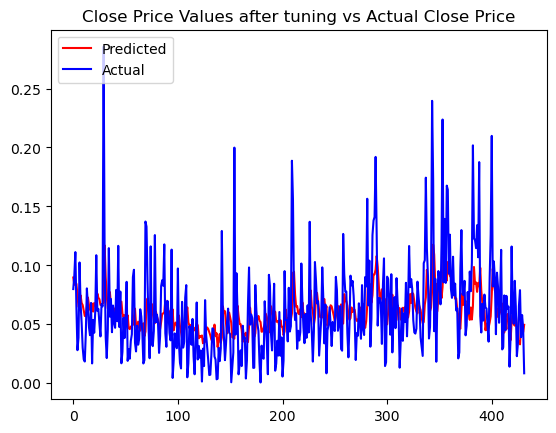

In [102]:
plt.plot(best_test_result_vol1['Test Pred'], label='Predicted', color='red')
plt.plot(best_test_result_vol1['Actual'], label='Actual', color='blue')
plt.title('Close Price Values after tuning vs Actual Close Price')
plt.legend(loc='upper left')
plt.show()